In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string
import nltk

df = pd.read_csv(r"C:\Users\reece\OneDrive\Documents\GitHub\noname\DSP-Final-Project\dataset.csv")

In [2]:
df.isnull().sum()
df = df.fillna(0)
df = df.dropna(axis=1, how='all')

In [13]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('/', '_')
print(df.columns)
print(len(df.columns))

Index(['age', 'bmi', 'elective_surgery', 'height', 'pre_icu_los_days',
       'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis',
       'apache_post_operative', 'arf_apache',
       ...
       'apache_2_bodysystem_Metabolic', 'apache_2_bodysystem_Neurologic',
       'apache_2_bodysystem_Renal_Genitourinary',
       'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma',
       'apache_2_bodysystem_UndefinedDiagnoses',
       'apache_2_bodysystem_Undefineddiagnoses', 'icu_stay_type_admit',
       'icu_stay_type_readmit', 'icu_stay_type_transfer'],
      dtype='object', length=123)
123


In [4]:
df.drop(['Unnamed: 83'],  axis=1, inplace=True)

In [5]:
# one hot encode the categorical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

dummies = pd.get_dummies(df[['icu_admit_source', 'ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'icu_stay_type']])
# concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, dummies], axis=1)
# drop the original categorical columns
df.drop(['icu_admit_source', 'ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'icu_stay_type'], axis=1, inplace=True)
print(df.columns)

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'weight',
       ...
       'apache_2_bodysystem_Metabolic', 'apache_2_bodysystem_Neurologic',
       'apache_2_bodysystem_Renal/Genitourinary',
       'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma',
       'apache_2_bodysystem_Undefined Diagnoses',
       'apache_2_bodysystem_Undefined diagnoses', 'icu_stay_type_admit',
       'icu_stay_type_readmit', 'icu_stay_type_transfer'],
      dtype='object', length=127)


In [ ]:
# manually drop irrelevant columns

In [6]:
df = df.drop(['encounter_id','patient_id','hospital_id','icu_id'],axis=1)

### Univariate Data Analysis

In [7]:
df.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer
0,68.0,22.73,0,180.3,0.541667,73.9,113.0,502.01,0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,77.0,27.42,0,160.0,0.927778,70.2,108.0,203.01,0,0.0,...,0,0,0,1,0,0,0,1,0,0
2,25.0,31.95,0,172.7,0.000694,95.3,122.0,703.03,0,0.0,...,1,0,0,0,0,0,0,1,0,0
3,81.0,22.64,1,165.1,0.000694,61.7,203.0,1206.03,1,0.0,...,0,0,0,0,0,0,0,1,0,0
4,19.0,0.00,0,188.0,0.073611,0.0,119.0,601.01,0,0.0,...,0,0,0,0,1,0,0,1,0,0


In [8]:
for feature in df.columns:
    print("Mean of " + feature + " is ", df[feature].mean())
    print("Median of " + feature + " is ", df[feature].median())
    print("Standard Deviation of " + feature + " is ", df[feature].std())
    print()

Mean of age is  59.43702637575916
Median of age is  64.0
Standard Deviation of age is  20.956281167276043

Mean of bmi is  28.09460738447636
Median of bmi is  27.37499672
Standard Deviation of bmi is  9.827264596463628

Mean of elective_surgery is  0.18373622060122338
Median of elective_surgery is  0.0
Standard Deviation of elective_surgery is  0.3872710383527484

Mean of height is  167.1740873158658
Median of height is  170.0
Standard Deviation of height is  22.96413950815336

Mean of pre_icu_los_days is  0.835766050667986
Median of pre_icu_los_days is  0.138888889
Standard Deviation of pre_icu_los_days is  2.4877561731500593

Mean of weight is  81.53624916860205
Median of weight is  79.5
Standard Deviation of weight is  28.46435576292045

Mean of apache_2_diagnosis is  182.04193516731544
Median of apache_2_diagnosis is  122.0
Standard Deviation of apache_2_diagnosis is  88.78174102384105

Mean of apache_3j_diagnosis is  551.5150775789692
Median of apache_3j_diagnosis is  407.01
Stand

In [21]:
# will directly analyze the values of a specific feature
# print(df.iloc[0].value_counts())

<class 'pandas.core.series.Series'>


In [14]:
for feature in df:
    if feature == 'icu_admit_source':
        continue
    df.boxplot([feature])
    # plt.ylim(df[feature].min(), df[feature].max())
    plt.savefig("output/feature_boxplots/"+feature+".png")
    plt.figure()

In [17]:
for feature in df:
    df.hist(column=feature, grid=False, edgecolor='black')
    plt.savefig("output\\feature_histograms\\"+feature+".png")

In [ ]:
# # univariate data analysis

# import pandas as pd
# import seaborn as sns

# # perform univariate analysis
# # summary statistics
# print(df.describe())

# # histogram
# df.hist()

# # kernel density plot
# df.plot(kind='density')

# # box plot
# df.plot(kind='box')

### Bivariate Data Analysis

In [18]:
df.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal_Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_UndefinedDiagnoses,apache_2_bodysystem_Undefineddiagnoses,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer
0,68.0,22.73,0,180.3,0.541667,73.9,113.0,502.01,0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,77.0,27.42,0,160.0,0.927778,70.2,108.0,203.01,0,0.0,...,0,0,0,1,0,0,0,1,0,0
2,25.0,31.95,0,172.7,0.000694,95.3,122.0,703.03,0,0.0,...,1,0,0,0,0,0,0,1,0,0
3,81.0,22.64,1,165.1,0.000694,61.7,203.0,1206.03,1,0.0,...,0,0,0,0,0,0,0,1,0,0
4,19.0,0.00,0,188.0,0.073611,0.0,119.0,601.01,0,0.0,...,0,0,0,0,1,0,0,1,0,0


In [28]:
print(df['bmi'].unique())

[22.73       27.42       31.95       ... 33.81054776 45.93520298
 47.17967094]


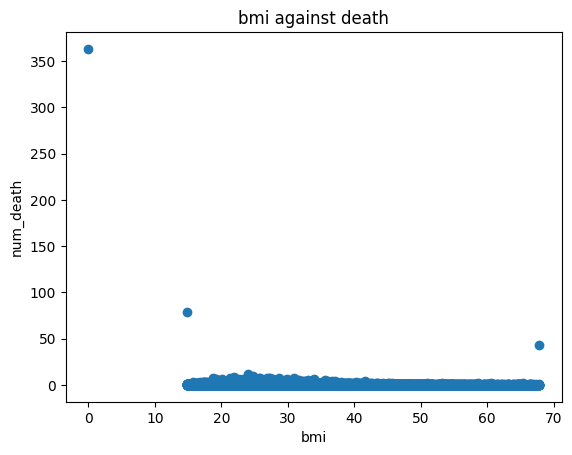

In [49]:
df['bmi'].value_counts()
df1 = df['bmi'].unique()
dict = {}
# death_per_feat = df['age']==1
# df1 = df[death_per_feat]
# df1
for val in df1:
    death_per_feat = df['bmi']==val
    death_per_feat = df[death_per_feat]
    num_death = sum(death_per_feat['hospital_death'])
    dict[val] = num_death
bmi = pd.DataFrame()
bmi['bmi'] = dict.keys()
bmi['num_deaths'] = dict.values()
plt.figure()
plt.scatter(x=bmi['bmi'],y=bmi['num_deaths'])
plt.xlabel('bmi')
plt.ylabel('num_death')
plt.title('bmi against death')
plt.show()


In [57]:
# saving scatter plots of data against death

for feature in df.columns:
    if feature == 'hospital_death':
        continue
    df1 = df[feature].unique()
    feature_dict = {}
    # death_per_feat = df['age']==1
    # df1 = df[death_per_feat]
    # df1
    for val in df1:
        death_per_feat = df[feature]==val
        death_per_feat = df[death_per_feat]
        num_death = sum(death_per_feat['hospital_death'])
        feature_dict[val] = num_death
    feat = pd.DataFrame()
    feat[feature] = feature_dict.keys()
    feat['num_deaths'] = feature_dict.values()
    plt.figure()
    plt.scatter(x=feat[feature],y=feat['num_deaths'])
    plt.xlabel(feature)
    plt.ylabel('num_death')
    plt.title(feature + ' against death')
    plt.savefig("output/feature_scatterplots/"+feature+".png")
    

In [60]:
df.corr().to_csv(r"C:\Users\reece\OneDrive\Documents\GitHub\noname\DSP-Final-Project\output\correlation_matrix.csv")

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()

In [ ]:
# correlation and feature removal

import pandas as pd

# Find correlation matrix
corr_matrix = df.corr().abs()
# Set threshold for correlation coefficient
threshold = 0.85

# copy df into dropped_df
dropped_df = df.copy()
# Find features with correlation greater than threshold
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] >= threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            if colname_i not in high_corr_features:
                high_corr_features.add(colname_j)

# Remove highly correlated features from DataFrame
dropped_df.drop(high_corr_features, axis=1, inplace=True)
print(len(dropped_df.columns))

In [ ]:
# removing outliers using z-score
import pandas as pd
from scipy.stats import zscore

# Calculate z-scores for each feature
z_scores = df.apply(zscore)

# # Identify outliers by setting a threshold for z-score
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# # Remove outliers from DataFrame
df_outliers_removed = df[~outliers]
print(df_outliers_removed.shape)

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# set the target variable column name
target_col = 'hospital_death'

# split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# initialize the list of selected features
selected_features = []

# create a copy of the training set to keep track of the remaining features
remaining_features = train_df.columns.drop(target_col)

# iterate over the remaining features and select the one that has the highest F-value
while len(remaining_features) > 0:
    f_values, p_values = f_classif(train_df[remaining_features], train_df[target_col])
    best_feature_index = np.argmax(f_values)
    best_feature = remaining_features[best_feature_index]
    
    # add the best feature to the list of selected features and remove it from the remaining features
    selected_features.append(best_feature)
    remaining_features = remaining_features.drop(best_feature)
    
    # print the selected feature and its corresponding F-value
    # print('Selected feature:', best_feature, 'with F-value:', f_values[best_feature_index])

# create a new DataFrame with the selected features
forward_selected_df = train_df[selected_features + [target_col]]

# display the selected features
print('Selected features:', selected_features)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Create a sample dataset with 4 features and 100 samples
X = np.random.rand(100, 4)

# Instantiate a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(X)

# Transform the data to the new coordinate system
X_transformed = pca.transform(X)

# Print the explained variance ratio of each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the transformed data
print("Transformed data:", X_transformed)

# Modeling

- Random forest
- XGBoost
- Catboost 
- Decision Trees
- Stacking 